In [ ]:
from google.colab import drive
drive.mount("/content/drive")

MessageError: ignored

# New Section

# New Section

In [ ]:
import numpy
import os
# voc12 palette - 21 labels
palette = numpy.array([[0, 0, 0],  # "background"
                    [128, 0, 0],  # "aeroplane"
                    [0, 128, 0],  # "bicycle"
                    [128, 128, 0],  # "bird"
                    [0, 0, 128],  # "boat"
                    [128, 0, 128],  # "bottle"
                    [0, 128, 128],  # "bus"
                    [128, 128, 128],  # "car"
                    [64, 0, 0],  # "cat"
                    [192, 0, 0],  # "chair"
                    [64, 128, 0],  # "cow"
                    [192, 128, 0],  # "diningtable"
                    [64, 0, 128],  # "dog"
                    [192, 0, 128],  # "horse"
                    [64, 128, 128],  # "motorbike"
                    [192, 128, 128],  # "person"
                    [0, 64, 0],  # "potted plant"
                    [128, 64, 0],  # "sheep"
                    [0, 192, 0],  # "sofa"
                    [128, 192, 0],  # "train"
                    [0, 64, 128]], dtype='uint8')  # "tv/monitor"

VOID_COLOR = 255
VOID_RGB = [224, 224, 192]


def calculate_accuracy(y_true, y_pred):
    tp = 0.0
    fp = 0.0
    ignore = 0

    for index in numpy.ndindex(y_true.shape):
        if y_true[index] == VOID_COLOR:
            ignore += 1
        elif y_true[index] == y_pred[index]:
            tp += 1
        else:
            fp += 1

    accuracy = tp / (tp + fp)
    ignore_percentage = float(ignore) / y_true.size * 100
    print ("Ignore count (void pixels): {} out of {} pixels ({}%)".format(ignore, y_true.size, ignore_percentage))
    print ("Accuracy: {}".format(accuracy))


# Source: https://github.com/tensorflow/models/blob/master/research/deeplab/utils/get_dataset_colormap.py
DATASET_MAX_ENTRIES = 256


def bit_get(val, idx):
    return (val >> idx) & 1


def create_pascal_label_colormap():
    """Creates a label colormap used in PASCAL VOC segmentation benchmark.
    Returns:
    A colormap for visualizing segmentation results.
    """
    colormap = numpy.zeros((DATASET_MAX_ENTRIES, 3), dtype=int)
    ind = numpy.arange(DATASET_MAX_ENTRIES, dtype=int)

    for shift in reversed(range(8)):
        for channel in range(3):
            colormap[:, channel] |= bit_get(ind, channel) << shift
        ind >>= 3

    return colormap


if __name__ == '__main__':
    print (create_pascal_label_colormap())  # This creates the entire 256 colors, we use only the first 21


[[  0   0   0]
 [128   0   0]
 [  0 128   0]
 [128 128   0]
 [  0   0 128]
 [128   0 128]
 [  0 128 128]
 [128 128 128]
 [ 64   0   0]
 [192   0   0]
 [ 64 128   0]
 [192 128   0]
 [ 64   0 128]
 [192   0 128]
 [ 64 128 128]
 [192 128 128]
 [  0  64   0]
 [128  64   0]
 [  0 192   0]
 [128 192   0]
 [  0  64 128]
 [128  64 128]
 [  0 192 128]
 [128 192 128]
 [ 64  64   0]
 [192  64   0]
 [ 64 192   0]
 [192 192   0]
 [ 64  64 128]
 [192  64 128]
 [ 64 192 128]
 [192 192 128]
 [  0   0  64]
 [128   0  64]
 [  0 128  64]
 [128 128  64]
 [  0   0 192]
 [128   0 192]
 [  0 128 192]
 [128 128 192]
 [ 64   0  64]
 [192   0  64]
 [ 64 128  64]
 [192 128  64]
 [ 64   0 192]
 [192   0 192]
 [ 64 128 192]
 [192 128 192]
 [  0  64  64]
 [128  64  64]
 [  0 192  64]
 [128 192  64]
 [  0  64 192]
 [128  64 192]
 [  0 192 192]
 [128 192 192]
 [ 64  64  64]
 [192  64  64]
 [ 64 192  64]
 [192 192  64]
 [ 64  64 192]
 [192  64 192]
 [ 64 192 192]
 [192 192 192]
 [ 32   0   0]
 [160   0   0]
 [ 32 128 

In [ ]:

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Add, ZeroPadding2D, Dropout, Activation, UpSampling2D


WEIGHTS_PATH = '/content/drive/My Drive/deeplabV2_weights_tf.h5'
VOC2012_CLASSES_COUNT = 21




In [ ]:
def DeeplabV2(input_shape,
            upsampling=8,
            apply_softmax=True,
            load_weights=True,
            classes=VOC2012_CLASSES_COUNT):

    if load_weights and classes != VOC2012_CLASSES_COUNT:
        raise ValueError('For using existing weights - `classes` should be 21')

    img_input = Input(shape=input_shape)

    # Block 1
    h = ZeroPadding2D(padding=(1, 1))(img_input)
    h = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name='conv1_1')(h)
    h = ZeroPadding2D(padding=(1, 1))(h)
    h = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name='conv1_2')(h)
    h = ZeroPadding2D(padding=(1, 1))(h)
    h = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(h)

    # Block 2
    h = ZeroPadding2D(padding=(1, 1))(h)
    h = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', name='conv2_1')(h)
    h = ZeroPadding2D(padding=(1, 1))(h)
    h = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', name='conv2_2')(h)
    h = ZeroPadding2D(padding=(1, 1))(h)
    h = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(h)

    # Block 3
    h = ZeroPadding2D(padding=(1, 1))(h)
    h = Conv2D(filters=256, kernel_size=(3, 3), activation='relu', name='conv3_1')(h)
    h = ZeroPadding2D(padding=(1, 1))(h)
    h = Conv2D(filters=256, kernel_size=(3, 3), activation='relu', name='conv3_2')(h)
    h = ZeroPadding2D(padding=(1, 1))(h)
    h = Conv2D(filters=256, kernel_size=(3, 3), activation='relu', name='conv3_3')(h)
    h = ZeroPadding2D(padding=(1, 1))(h)
    h = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(h)

    # Block 4
    h = ZeroPadding2D(padding=(1, 1))(h)
    h = Conv2D(filters=512, kernel_size=(3, 3), activation='relu', name='conv4_1')(h)
    h = ZeroPadding2D(padding=(1, 1))(h)
    h = Conv2D(filters=512, kernel_size=(3, 3), activation='relu', name='conv4_2')(h)
    h = ZeroPadding2D(padding=(1, 1))(h)
    h = Conv2D(filters=512, kernel_size=(3, 3), activation='relu', name='conv4_3')(h)
    h = ZeroPadding2D(padding=(1, 1))(h)
    h = MaxPooling2D(pool_size=(3, 3), strides=(1, 1))(h)

    # Block 5
    h = ZeroPadding2D(padding=(2, 2))(h)
    h = Conv2D(filters=512, kernel_size=(3, 3), dilation_rate=(2, 2), activation='relu', name='conv5_1')(h)
    h = ZeroPadding2D(padding=(2, 2))(h)
    h = Conv2D(filters=512, kernel_size=(3, 3), dilation_rate=(2, 2), activation='relu', name='conv5_2')(h)
    h = ZeroPadding2D(padding=(2, 2))(h)
    h = Conv2D(filters=512, kernel_size=(3, 3), dilation_rate=(2, 2), activation='relu', name='conv5_3')(h)
    h = ZeroPadding2D(padding=(1, 1))(h)
    p5 = MaxPooling2D(pool_size=(3, 3), strides=(1, 1))(h)

    # branching for Atrous Spatial Pyramid Pooling - Until here -14 layers
    # hole = 6
    b1 = ZeroPadding2D(padding=(6, 6))(p5)
    b1 = Conv2D(filters=1024, kernel_size=(3, 3), dilation_rate=(6, 6), activation='relu', name='fc6_1')(b1)
    b1 = Dropout(0.5)(b1)
    b1 = Conv2D(filters=1024, kernel_size=(1, 1), activation='relu', name='fc7_1')(b1)
    b1 = Dropout(0.5)(b1)
    b1 = Conv2D(filters=21, kernel_size=(1, 1), activation='relu', name='fc8_voc12_1')(b1)

    # hole = 12
    b2 = ZeroPadding2D(padding=(12, 12))(p5)
    b2 = Conv2D(filters=1024, kernel_size=(3, 3), dilation_rate=(12, 12), activation='relu', name='fc6_2')(b2)
    b2 = Dropout(0.5)(b2)
    b2 = Conv2D(filters=1024, kernel_size=(1, 1), activation='relu', name='fc7_2')(b2)
    b2 = Dropout(0.5)(b2)
    b2 = Conv2D(filters=21, kernel_size=(1, 1), activation='relu', name='fc8_voc12_2')(b2)

    # hole = 18
    b3 = ZeroPadding2D(padding=(18, 18))(p5)
    b3 = Conv2D(filters=1024, kernel_size=(3, 3), dilation_rate=(18, 18), activation='relu', name='fc6_3')(b3)
    b3 = Dropout(0.5)(b3)
    b3 = Conv2D(filters=1024, kernel_size=(1, 1), activation='relu', name='fc7_3')(b3)
    b3 = Dropout(0.5)(b3)
    b3 = Conv2D(filters=21, kernel_size=(1, 1), activation='relu', name='fc8_voc12_3')(b3)

    # hole = 24
    b4 = ZeroPadding2D(padding=(24, 24))(p5)
    b4 = Conv2D(filters=1024, kernel_size=(3, 3), dilation_rate=(24, 24), activation='relu', name='fc6_4')(b4)
    b4 = Dropout(0.5)(b4)
    b4 = Conv2D(filters=1024, kernel_size=(1, 1), activation='relu', name='fc7_4')(b4)
    b4 = Dropout(0.5)(b4)
    b4 = Conv2D(filters=21, kernel_size=(1, 1), activation='relu', name='fc8_voc12_4')(b4)

    s = Add()([b1, b2, b3, b4])
    logits = UpSampling2D(size=upsampling, interpolation='bilinear')(s)

    if apply_softmax:
        out = Activation('softmax')(logits)
    else:
        out = logits

    model = Model(img_input, out, name='deeplabV2')
    model.load_weights(WEIGHTS_PATH)

    return model


Model: "deeplabV2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_44 (ZeroPadding  (None, 514, 514, 3)  0          ['input_3[0][0]']                
 2D)                                                                                              
                                                                                                  
 conv1_1 (Conv2D)               (None, 512, 512, 64  1792        ['zero_padding2d_44[0][0]']      
                                )                                                         

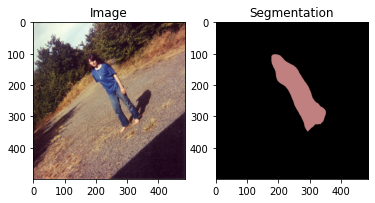

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os
#from utils import palette, calculate_accuracy

#from deeplabv2_model import DeeplabV2


# predicts an image, with the cropping policy of deeplab (single scale for simplicity)
def predict(img, model, crop_size):
    img = img.astype(np.float32)
    h, w, c = img.shape
    c_h, c_w = crop_size

    assert (c_h >= 500 and c_w >= 500), 'Crop size should be greater than 500 for VOC12.'

    pad_height = max(c_h - h, 0)
    pad_width = max(c_w - w, 0)

    # Expand the size of the images to match pad_height, padding right-bottom
    x = cv2.copyMakeBorder(src=img, top=0, bottom=pad_height, left=0, right=pad_width,
                           borderType=cv2.BORDER_CONSTANT, value=np.array([104.008, 116.669, 122.675]))

    # Subtract the values of the padded border so border will be zero
    x[:, :, 0] -= 104.008
    x[:, :, 1] -= 116.669
    x[:, :, 2] -= 122.675

    x_batch = np.expand_dims(x, axis=0)  # Convert to 4d tensor where first dim is batch count=1
    prob = model.predict(x_batch)[0]  # remove batch dimension
    prob = prob[0:h:, 0:w, :]  # resize to match original image
    pred = np.argmax(prob, axis=2)  # get maximum along channels (labels option)
    return pred


def visualize(img, pred):
    # convert prediction to color
    pred_image = palette[pred.ravel()].reshape(img.shape)
    # visualize results
    fig = plt.figure()
    a = fig.add_subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    a.set_title('Image')
    a = fig.add_subplot(1, 2, 2)
    plt.imshow(pred_image)
    a.set_title('Segmentation')
    plt.show(fig)


def main():
    model = DeeplabV2(input_shape=(512, 512, 3), apply_softmax=False)
    model.summary()

    # predict image
    # Note - imread open the image in BGR order

    print(os.listdir("/content/drive/My Drive/Pascal_sample/"))
    img = cv2.imread("/content/drive/My Drive/Pascal_sample/2007_000027.jpg")
    print(img.shape)
    pred = predict(img=img, model=model, crop_size=(512, 512))

    #gt_img = Image.open('imgs_deeplabv2/GT/2007_000129.png')
    #label_image = np.array(gt_img)
    #calculate_accuracy(label_image, pred)
    visualize(img, pred)


if __name__ == '__main__':
    main()